In [1]:
import csv
import os
from functools import partial
import json

import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
from random import random

from sklearn.manifold import MDS
from iowa import *

import yaml



In [3]:
import yaml
from iowa import *

with open('settings.yaml', 'r') as stream:
    settings = yaml.load(stream)

graph = Graph.from_file(settings['data_path_shp'], reproject=False)

partitions = MC_sample(graph, settings)

C:\Users\Mélisande\Anaconda3\envs\VRDI\lib\site-packages\ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


computed initial partition
Markov chain step 0
Markov chain step 100
Markov chain step 200
Markov chain step 300
Markov chain step 400
Markov chain step 500
Markov chain step 600
Markov chain step 700
Markov chain step 800


KeyboardInterrupt: 

In [ ]:

partitions

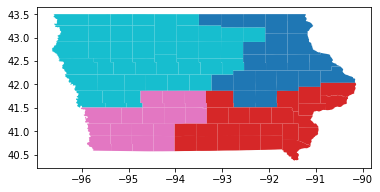

In [4]:
# initial configuration
partitions[0].plot(df)

In [ ]:
distances = build_distances_matrix(partitions)
np.save("flip_run1.npy",distances)

In [5]:
distances = np.load("flip_MDS_run1.npy")

C:\Users\Mélisande\Anaconda3\envs\VRDI\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


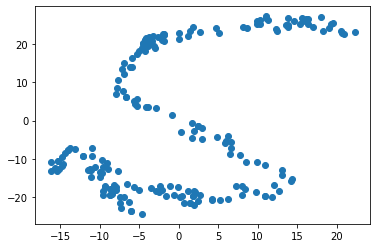

In [6]:
mds = MDS(n_components=2, metric=True, n_init=4, max_iter=300, verbose=0, eps=0.001, n_jobs=None, random_state=None, dissimilarity='euclidean')

pos=mds.fit(distances).embedding_
X=[]
Y=[]
for i in range(200):
    X.append(pos[i][0])
    Y.append(pos[i][1])
  
plt.scatter(X,Y)

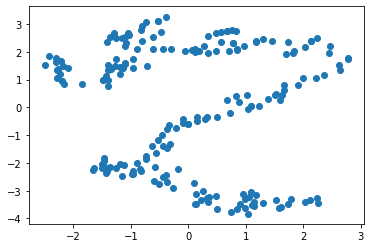

In [8]:
import sklearn
smacof, _=sklearn.manifold.mds.smacof(distances, metric=True, n_components=2, init=None, n_init=8, n_jobs=None, max_iter=300, verbose=0, eps=0.001, random_state=None, return_n_iter=False)

x=[t[0] for t in smacof]
y=[t[1] for t in smacof]

plt.scatter(x,y)


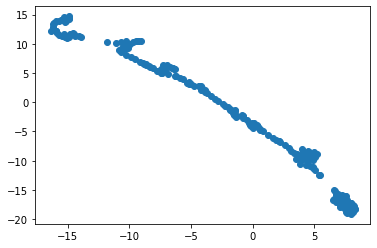

In [9]:
X_embedded=sklearn.manifold.TSNE(n_components=2).fit_transform(distances)

X2=[]
Y2=[]
for i in range(200):
    X2.append(X_embedded[i][0])
    Y2.append(X_embedded[i][1])
   
plt.scatter(X2,Y2)
